In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

In [6]:
bs = 64

In [7]:
path = Path('../../challenges/1')
path

PosixPath('../../challenges/1')

In [8]:
path_img = path/'images'

In [9]:
path.ls()

[PosixPath('../../challenges/1/images'),
 PosixPath('../../challenges/1/annotations')]

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('../../challenges/1/images/Normal_341.png'),
 PosixPath('../../challenges/1/images/Normal_144.png'),
 PosixPath('../../challenges/1/images/Normal_151.png'),
 PosixPath('../../challenges/1/images/Normal_347.png'),
 PosixPath('../../challenges/1/images/Normal_223.png')]

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [12]:
data = ImageDataBunch.from_name_re(
            path_img,
            fnames,
            pat,
            ds_tfms=get_transforms(),
            size=365,
            bs=bs
        ).normalize(imagenet_stats)

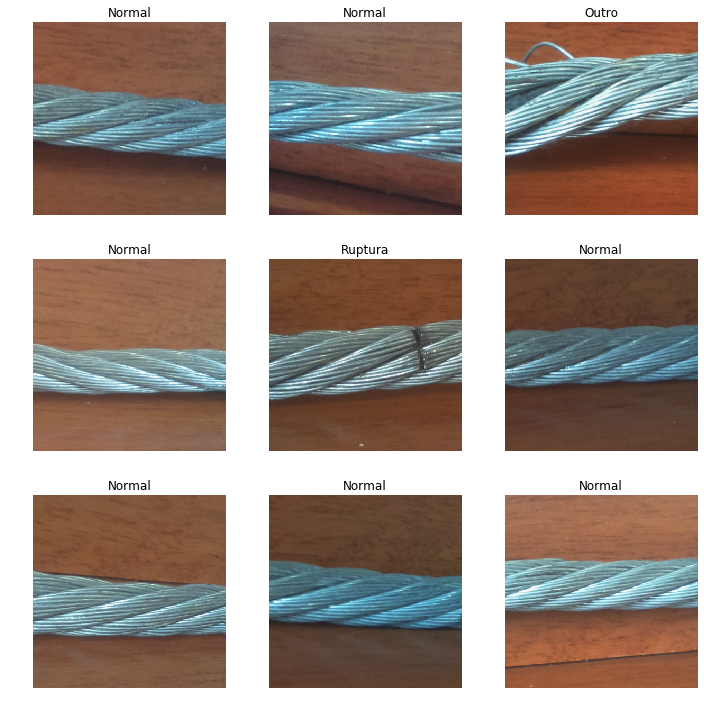

In [13]:
data.show_batch(rows=3, figsize=(10,10))

In [14]:
print(data.classes)
len(data.classes)
data.c

['Normal', 'Outro', 'Ruptura']


3

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [16]:
import torch
torch.cuda.empty_cache()

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.634108,1.402512,0.739726,02:12
1,0.664763,1.309545,0.712329,02:15
2,0.620893,1.201127,0.739726,02:14
3,0.585240,1.153634,0.726027,02:14


In [30]:
learn.save('v1')

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

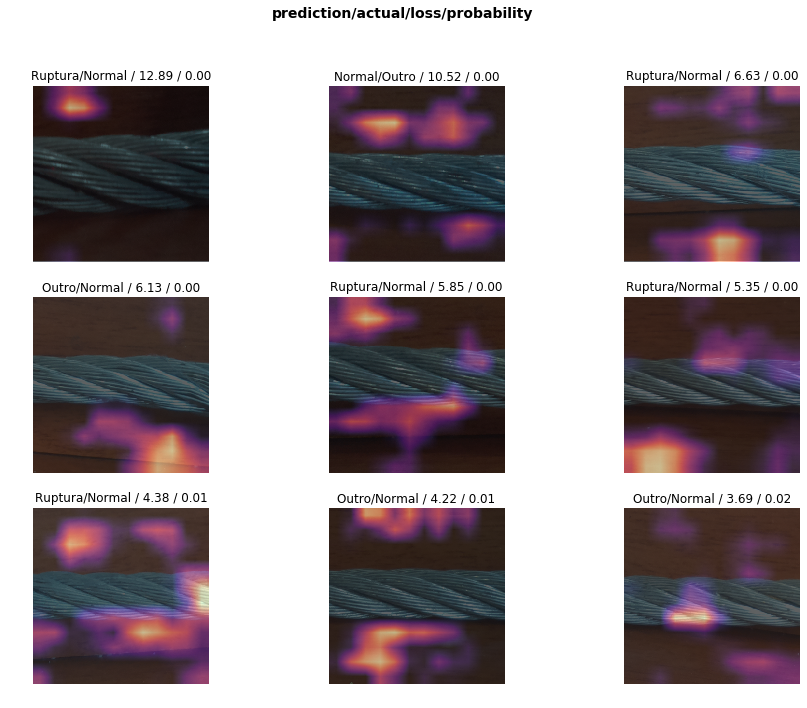

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

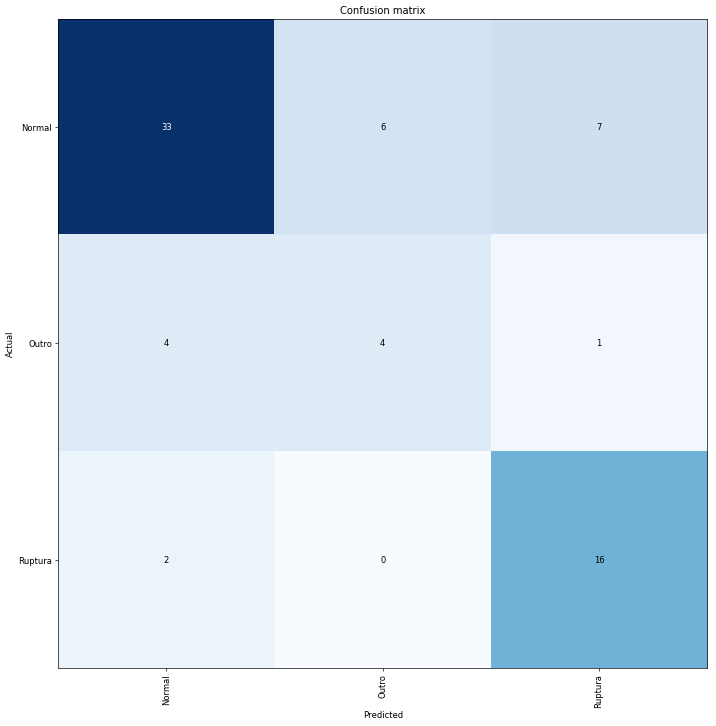

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused(min_val=2)

[('Normal', 'Ruptura', 7),
 ('Normal', 'Outro', 6),
 ('Outro', 'Normal', 4),
 ('Ruptura', 'Normal', 2)]

In [35]:
learn.export()